<a href="https://colab.research.google.com/github/DreamTeamInc/Core-DS/blob/issues%2F1/Core_EDA_Andrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Path to 'sample_core_analysis_data_example' folder with folder name
path_to_data = 'drive/My Drive/ sample_core_analysis_data_example'

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Initializing packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2 as cv
import seaborn as sns

from PIL import Image
from skimage import exposure
from skimage import io

import sklearn
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [5]:
data = pd.read_csv(path_to_data + '/data.csv')
data

,task_id,photo_id,photo_type,segment_num,segment_type,segment_value
0,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,0,Свечение,Насыщенное
1,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,1,Свечение,Отсутствует
2,cfb8e7b2_7c98_4bd4_897d_0e5e95801bc9,1016625,УФ,0,Свечение,Карбонатное
3,a9d8f546_9046_46ce_ba17_abda344a0980,1013361,УФ,0,Свечение,Карбонатное
4,eb09a8aa_6c77_41de_8489_f5a390c789e8,1016727,УФ,0,Свечение,Карбонатное
...,...,...,...,...,...,...
14910,de63ac27_e98e_459a_9672_b07415228a50,1009408,ДС,6,Разрушенность,Разлом
14911,de63ac27_e98e_459a_9672_b07415228a50,1009408,ДС,7,Разрушенность,Разлом
14912,de63ac27_e98e_459a_9672_b07415228a50,1009408,ДС,8,Разрушенность,Разлом
14913,de63ac27_e98e_459a_9672_b07415228a50,1009408,ДС,9,Разрушенность,Разлом


## **Functions for getting data** 

In [6]:
def get_photo(data,i):
  return io.imread(path_to_data + '/photos/{}.jpeg'.format(data['photo_id'][i]))

def get_photo_by_id(data,id):
  return io.imread(path_to_data + '/photos/{}.jpeg'.format(id))

def get_mask(data, i):
    return np.load(path_to_data + '/matrixes/matrix_{}__{}.npz'.format(data['photo_id'][i], data['task_id'][i]))['data']

def get_json(data,i):
  with open(path_to_data + '/extra/extra_{}__{}.json'.format(data['photo_id'][i],data['task_id'][i])) as json_data:
    d = json.load(json_data)
    json_data.close()
  return d

## **Functions for displaying data**


In [7]:
def show_image(image,nrows=1,ncols=1,cmap='gray'):
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
  ax.imshow(image)
  ax.axis('off')
  return fig, ax

def show_all_photo_data(data,i):
  print(data.iloc[i])
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
  ax1.imshow(get_photo(data, i))
  
  mask = get_mask(data,i)
  cmap = plt.get_cmap('tab20b', np.max(mask) + 1)
  mask = ax2.imshow(mask, cmap=cmap,vmin=-0.5, vmax=np.max(get_mask(data, i))+0.5)
  ax2.axis('off')
  fig.colorbar(mask, ticks=np.arange(0, np.max(get_mask(data, i))+1))
  return fig, (ax1, ax2)

def show_photo_series(data, column, value):
    fig, ax_ar = plt.subplots(1, 10, figsize=(14, 14))
    filt_data = data[data[column] == value]
    i = np.random.randint(0, filt_data.shape[0])
    for ax in ax_ar:
        filt_by_photo = filt_data[filt_data['photo_id'] == filt_data['photo_id'].iloc[i]]
        segments = filt_by_photo['segment_num'].values
        photo = get_photo(data, filt_by_photo.index.values[0])
        mask = get_mask(data, filt_by_photo.index.values[0])
        for value in segments:
            mask = np.ma.masked_where(mask == value, mask)
        
        ax.imshow(photo)
        ax.imshow(mask)
        ax.axis('off')
        filt_data.drop(filt_by_photo.index.values, axis=0, inplace=True)
        i = np.random.randint(0, filt_data.shape[0])
    
    return fig, ax_ar

## **Data categorization**

In [ ]:
df = pd.DataFrame(0,index=np.array(range(1, 2061)),
                  columns=np.array(range(1, 21)))

In [ ]:
df = df.rename(columns = {1:'photo_id',2:'УФ',3:'ДС',4:'Насыщенное',5:'Отсутствует',6:'Карбонатное',7:'Разлом',8:'Проба',
                     9:'Аргиллит',10:'Переслаивание пород',11:'Алевролит глинистый',12:'Песчаник',13:'Глинисто-кремнистая порода',14:'Песчаник глинистый',
                     15:'Уголь',16:'Аргиллит углистый',17:'Алевролит',18:'Карбонатная порода',19:'Известняк',20:'Глина аргиллитоподобная'})

df['photo_id'] = data['photo_id'].unique()

In [ ]:
data[data['segment_value'] == 'Аргиллит'].shape

(757, 6)

In [ ]:
def categorical_features_transform(data,df,column_name):
  for pi in df['photo_id'].tolist():
    d = data[data['photo_id'] == pi]
    for value in d[column_name].values:
      df.loc[df['photo_id'] == pi,value] = 1
  return df

In [ ]:
df = categorical_features_transform(data,df,'photo_type')
df = categorical_features_transform(data,df,'segment_value')

df.to_csv('data_categorization.csv', index=False, header=False)

In [ ]:
df

,photo_id,УФ,ДС,Насыщенное,Отсутствует,Карбонатное,Разлом,Проба,Аргиллит,Переслаивание пород,Алевролит глинистый,Песчаник,Глинисто-кремнистая порода,Песчаник глинистый,Уголь,Аргиллит углистый,Алевролит,Карбонатная порода,Известняк,Глина аргиллитоподобная
1,1012473,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1016625,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1013361,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1016727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1003985,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,1012723,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2057,1003764,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
2058,1002852,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2059,1009408,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
plt.figure(figsize = (14,14),dpi = 80)
sns.heatmap(df.corr(),xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of signs',fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.savefig('heatmap.png')

# **Preprocessing**

## **Analysis of pictures in ultraviolet**

In [10]:
uv_data = data=data[data['photo_type'] == 'УФ']

In [9]:
uv_data.reset_index(inplace = True, drop = True)
uv_data = uv_data.assign(histogram_features = 0)

## **Using distribution histogram descriptor**

In [ ]:
from skimage.color import rgb2gray

for i in range(uv_data.shape[0]):
  segment_num = uv_data['segment_num'].iloc[i]
  part_of_photo = np.ma.masked_where(get_mask(uv_data,i) == segment_num, rgb2gray(get_photo(uv_data,i)))
  hist = np.histogram(part_of_photo.mask * part_of_photo.data, bins = 64, range = (0,1))
  uv_data['histogram_features'].iloc[i] = np.array(hist[0][1:] / np.sum(part_of_photo.mask),dtype=object)

In [ ]:
uv_data.to_csv('uv_data_with_segments_feature.csv', index=False)

In [ ]:
train_data = pd.DataFrame(data=0,columns = range(uv_data['histogram_features'][0].shape[0] + 1),index=range(1805))

In [ ]:
for i in range(train_data.shape[0]):
  for k in range(uv_data['histogram_features'][0].shape[0]):
    train_data[k].loc[i] = uv_data['histogram_features'][i][k]
  train_data[63].loc[i] = uv_data['segment_value'].loc[i]

In [ ]:
train_data.to_csv('train_data_histogram_features.csv', index=False)

In [ ]:
train_data = pd.read_csv('drive/My Drive/data/train_data_histogram_features.csv')

In [ ]:
y = train_data['63']
train_data.drop(['63'],axis='columns', inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.3, shuffle=False)

## **SVM**

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV


parametrs = {'kernel':('linear', 'rbf'), 'C':[1, 10],'degree':[3,4,5,6,7,8],
             'tol':[1e-3,1e-4,5e-4]}
svc = svm.SVC()

clf = GridSearchCV(svc,parametrs)


clf.fit(X_train,y_train)

sorted(clf.cv_results_.keys())

KeyboardInterrupt: ignored

In [ ]:
clf.best_params_

{'C': 10, 'degree': 3, 'kernel': 'rbf', 'tol': 0.001}

In [ ]:
from sklearn import svm, metrics


classifier = svm.SVC(C=10,degree=3,kernel='rbf',tol=0.001)



classifier.fit(X_train,y_train)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted = classifier.predict(X_test)


In [ ]:
sklearn.metrics.accuracy_score(y_test,predicted)

0.8782287822878229

In [ ]:
sklearn.metrics.f1_score(y_test,predicted, average='macro')

0.7882402273572674

## **RandomForestClassifier**

In [360]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


parametrs = {'n_estimators' : [320,330,340],'random_state' : [0],
             'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier()

clf = GridSearchCV(rfc,parametrs)


clf.fit(X_train,y_train)

clf.best_params_

{'criterion': 'entropy', 'n_estimators': 340, 'random_state': 0}

In [390]:

forest = RandomForestClassifier(criterion='entropy',random_state=0)



forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [391]:
predicted = forest.predict(X_test)

In [392]:
sklearn.metrics.accuracy_score(y_test,predicted)

0.8985239852398524

In [393]:
sklearn.metrics.f1_score(y_test,predicted, average='macro')

0.7651429506063779

## **Using HOG descriptor**

In [ ]:
uv_data

,task_id,photo_id,photo_type,segment_num,segment_type,segment_value
0,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,0,Свечение,Насыщенное
1,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,1,Свечение,Отсутствует
2,cfb8e7b2_7c98_4bd4_897d_0e5e95801bc9,1016625,УФ,0,Свечение,Карбонатное
3,a9d8f546_9046_46ce_ba17_abda344a0980,1013361,УФ,0,Свечение,Карбонатное
4,eb09a8aa_6c77_41de_8489_f5a390c789e8,1016727,УФ,0,Свечение,Карбонатное
...,...,...,...,...,...,...
1800,e278565e_1174_4b2a_8d7e_00a6622ce755,1007705,УФ,11,Свечение,Насыщенное
1801,e278565e_1174_4b2a_8d7e_00a6622ce755,1007705,УФ,12,Свечение,Отсутствует
1802,f9acac88_f3fb_4307_ba52_39f5ed061ea7,1002269,УФ,0,Свечение,Насыщенное
1803,d204752f_d975_4bf7_a124_7fae92ac81ca,1012723,УФ,0,Свечение,Карбонатное


In [ ]:
from skimage.feature import hog
from skimage.color import rgb2gray


for i in range(uv_data.shape[0]):
  segment_num = uv_data['segment_num'].iloc[i]
  part_of_photo = np.ma.masked_where(get_mask(uv_data,i) == segment_num, rgb2gray(get_photo(uv_data,i)))
  out = hog(part_of_photo,feature_vector=True,visualize=False,multichannel=True)

ValueError: ignored

In [ ]:
from skimage.feature import hog
from skimage.color import rgb2gray
# Извлекаем вектора признаков

arr=[]
for i in range(500):
  segment_num = uv_data['segment_num'].iloc[i]
  part_of_photo = np.ma.masked_where(get_mask(uv_data,i) == segment_num, rgb2gray(get_photo(uv_data,i)))
  out = hog(part_of_photo, feature_vector=True, visualize=False,orientations=1,multichannel=False)
  arr.append(list(out))
  print(i)
# Обрезаем все вектора до минимального размера вектора 

size_list = []
for i in range(len(arr)):
  size_list.append(len(arr[i]))

features=[]
for i in range(len(arr)):
  features.append(arr[i][:min(size_list)])  

In [ ]:
y_a = uv_data['segment_value'][:1000]

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

classifier1 = svm.SVC()
X_train, X_test, y_train, y_test = train_test_split(features, y_a, test_size=0.3, shuffle=False)

classifier1.fit(X_train,y_train)
predicted = classifier1.predict(X_test)


In [ ]:
sklearn.metrics.accuracy_score(y_test,predicted)

0.5666666666666667

In [ ]:
sklearn.metrics.f1_score(y_test,predicted, average='macro')

0.24113475177304963

## **Apply filters to images**

In [110]:
  from PIL.ImageFilter import  MedianFilter

  features_arr = []
  i = 0
  photo = get_photo(uv_data,i)
  mask = get_mask(uv_data,i)
  part_of_photo0 = np.ma.masked_where(mask == segment_num, photo[:,:,0])
  part_of_photo1 = np.ma.masked_where(mask == segment_num, photo[:,:,1])
  part_of_photo2 = np.ma.masked_where(mask == segment_num, photo[:,:,2])


  photo[:,:,0] = part_of_photo0.data * part_of_photo0.mask 
  photo[:,:,1] = part_of_photo1.data * part_of_photo1.mask 
  photo[:,:,2] = part_of_photo2.data * part_of_photo2.mask 
  
  photo = Image.fromarray(photo)
  photo = photo.filter(MedianFilter())

  hist = np.histogram(photo, bins = 64, range = (0,1))
  features_arr.append(list(np.array(hist[0][1:] / np.sum(part_of_photo.mask),dtype=object)))

In [11]:
uv_data

,task_id,photo_id,photo_type,segment_num,segment_type,segment_value
0,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,0,Свечение,Насыщенное
1,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,1,Свечение,Отсутствует
2,cfb8e7b2_7c98_4bd4_897d_0e5e95801bc9,1016625,УФ,0,Свечение,Карбонатное
3,a9d8f546_9046_46ce_ba17_abda344a0980,1013361,УФ,0,Свечение,Карбонатное
4,eb09a8aa_6c77_41de_8489_f5a390c789e8,1016727,УФ,0,Свечение,Карбонатное
...,...,...,...,...,...,...
1800,e278565e_1174_4b2a_8d7e_00a6622ce755,1007705,УФ,11,Свечение,Насыщенное
1801,e278565e_1174_4b2a_8d7e_00a6622ce755,1007705,УФ,12,Свечение,Отсутствует
1802,f9acac88_f3fb_4307_ba52_39f5ed061ea7,1002269,УФ,0,Свечение,Насыщенное
1803,d204752f_d975_4bf7_a124_7fae92ac81ca,1012723,УФ,0,Свечение,Карбонатное


task_id          cfb8e7b2_7c98_4bd4_897d_0e5e95801bc9
photo_id                                      1016625
photo_type                                         УФ
segment_num                                         0
segment_type                                 Свечение
segment_value                             Карбонатное
Name: 2, dtype: object


(<Figure size 720x720 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f28b22862e8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f28b22351d0>))

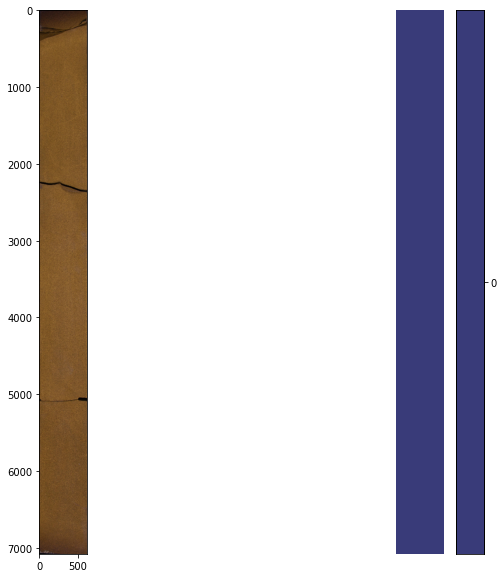

In [12]:
  show_all_photo_data(uv_data,2)

task_id          e278565e_1174_4b2a_8d7e_00a6622ce755
photo_id                                      1007705
photo_type                                         УФ
segment_num                                        12
segment_type                                 Свечение
segment_value                             Отсутствует
Name: 1801, dtype: object


(<Figure size 720x720 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f28a84e8860>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f28a8487828>))

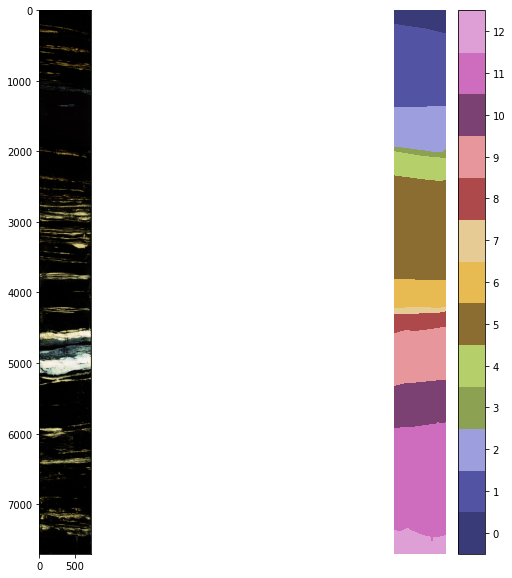

In [24]:
show_all_photo_data(uv_data,1801)

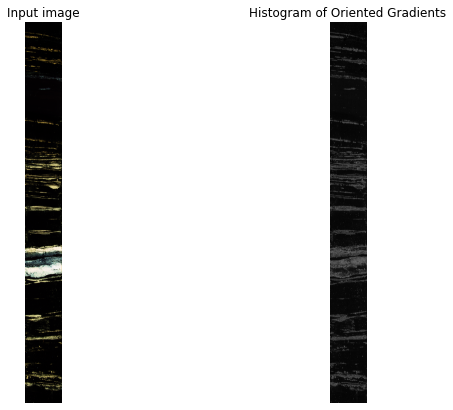

In [25]:
from skimage.feature import hog

image = get_photo(uv_data,1801)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(10, 10),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [151]:
mask = get_mask(uv_data,1801)

segments = []
for i in uv_data[uv_data['photo_id'] == 1007705]['segment_num']:
  photo = get_photo(uv_data,1801)
  part_of_photo0 = np.ma.masked_where(mask == i, photo[:,:,0])
  part_of_photo1 = np.ma.masked_where(mask == i, photo[:,:,1])
  part_of_photo2 = np.ma.masked_where(mask == i, photo[:,:,2])

  photo[:,:,0] = part_of_photo0.data * part_of_photo0.mask 
  photo[:,:,1] = part_of_photo1.data * part_of_photo1.mask 
  photo[:,:,2] = part_of_photo2.data * part_of_photo2.mask  

  segments.append(photo)

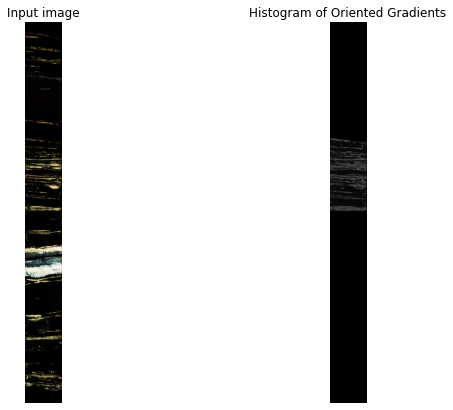

In [154]:
mask = get_mask(uv_data,1801)
photo = get_photo(uv_data,1801)
part_of_photo0 = np.ma.masked_where(mask == 5, photo[:,:,0])
part_of_photo1 = np.ma.masked_where(mask == 5, photo[:,:,1])
part_of_photo2 = np.ma.masked_where(mask == 5, photo[:,:,2])

photo[:,:,0] = part_of_photo0.data * part_of_photo0.mask 
photo[:,:,1] = part_of_photo1.data * part_of_photo1.mask 
photo[:,:,2] = part_of_photo2.data * part_of_photo2.mask  

fd, hog_image = hog(photo, orientations=8, pixels_per_cell=(10, 10),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

(array([[7.704e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [7.654e+03, 3.300e+01, 1.400e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [7.652e+03, 3.500e+01, 1.400e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [7.687e+03, 1.600e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [7.704e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [7.704e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([ 0.        ,  7.95374542, 15.90749085, 23.86123627, 31.8149817 ,
        39.76872712, 47.72247255, 55.67621797, 63.6299634 , 71.58370882,
        79.53745425]),
 <a list of 731 Lists of Patches objects>)

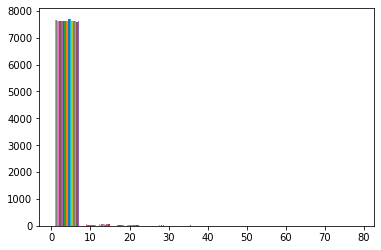

In [179]:
plt.hist(hog_image)

In [202]:
def white_balance_loops(img,hog_img):
    result = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    for x in range(result.shape[0]):
        for y in range(result.shape[1]):
          if hog_image[x,y] > 0 and hog_image[x,y] < 10: 
            l, a, b = result[x, y, :]
            # fix for CV correction
            l *= 100 / 255.0
            result[x, y, 1] = a - ((avg_a - 128) * (l / 100.0) * 1.1)
            result[x, y, 2] = b - ((avg_b - 128) * (l / 100.0) * 1.1)
    result = cv.cvtColor(result, cv.COLOR_LAB2BGR)
    return result

In [203]:
a = white_balance_loops(photo,hog_image)

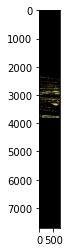

In [204]:
plt.imshow(a)

In [206]:
def histogram_equalize(img): 
    #img = rgb2gray(img) 
    img_cdf, bin_centers = exposure.cumulative_distribution(img) 
    return np.interp(img, bin_centers, img_cdf)

task_id          c6a24494_7931_4ca9_a148_f1fd9785b607
photo_id                                      1012473
photo_type                                         УФ
segment_num                                         1
segment_type                                 Свечение
segment_value                             Отсутствует
Name: 1, dtype: object


(<Figure size 720x720 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f2880c48d68>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f287cf9df60>))

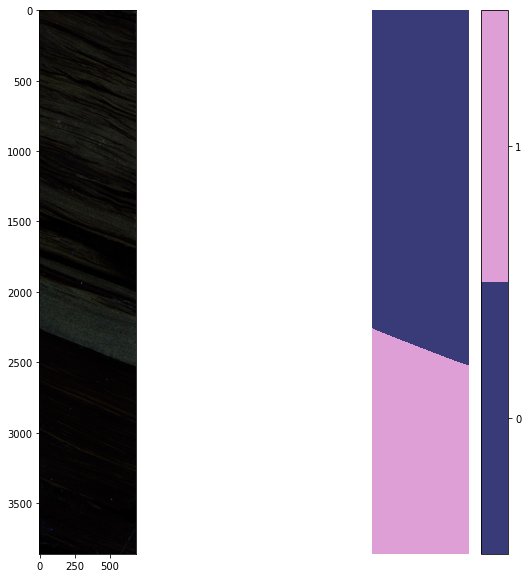

In [238]:
show_all_photo_data(uv_data,1)

In [236]:
g = get_photo(uv_data,1)

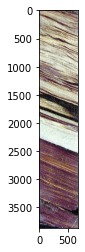

In [382]:
plt.imshow(histogram_equalize(g)) 

In [212]:
histogram_equalize(a).shape

(7704, 731, 3)

In [ ]:
from PIL.ImageFilter import  MedianFilter

features_arr = []
for i in range(uv_data.shape[0]):
#for i in range(500):
  segment_num = uv_data['segment_num'].iloc[i]
  photo = get_photo(uv_data,i)
  mask = get_mask(uv_data,i)
  photo = histogram_equalize(photo)
  part_of_photo0 = np.ma.masked_where(mask == segment_num, photo[:,:,0])
  part_of_photo1 = np.ma.masked_where(mask == segment_num, photo[:,:,1])
  part_of_photo2 = np.ma.masked_where(mask == segment_num, photo[:,:,2])
  print(i)

  #photo[:,:,0] = part_of_photo0.data * part_of_photo0.mask 
  #photo[:,:,1] = part_of_photo1.data * part_of_photo1.mask 
  #photo[:,:,2] = part_of_photo2.data * part_of_photo2.mask 

  hist0 = np.histogram(part_of_photo0.mask * part_of_photo0.data, bins = 64, range = (0,1))
  hist1 = np.histogram(part_of_photo1.mask * part_of_photo1.data, bins = 64, range = (0,1))
  hist2 = np.histogram(part_of_photo2.mask * part_of_photo2.data, bins = 64, range = (0,1))
  
  hist = np.concatenate((np.array(hist0[0][1:] / np.sum(part_of_photo0.mask),dtype=object),
                        np.array(hist1[0][1:] / np.sum(part_of_photo1.mask),dtype=object),
                        np.array(hist2[0][1:] / np.sum(part_of_photo2.mask),dtype=object)))
  features_arr.append(list(hist))

In [318]:
np.shape(features_arr)

(500, 189)

In [ ]:
features_arr[0]

In [260]:
min_size = len(features_arr[0])
for i in range(len(features_arr)):
  if len(features_arr[i]) < min_size:
    min_size = len(features_arr[i])
min_size

26000

In [264]:
fa = features_arr[:]

In [ ]:
fa

In [283]:
for i in range(len(fa)):
  fa[i] = fa[i][:min_size]

In [256]:
len(features_arr[0])

209984

In [337]:
y = uv_data['segment_value']

In [338]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_arr, y, test_size=0.3, shuffle=False)

In [343]:
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV


parametrs = {'kernel':('linear', 'rbf'), 'C':[1, 10],'degree':[3,4,5,6,7,8],
             'tol':[1e-3,1e-4,5e-4]}
svc = svm.SVC()

clf = GridSearchCV(svc,parametrs)


clf.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'degree': [3, 4, 5, 6, 7, 8],
                         'kernel': ('linear', 'rbf'),
                         'tol': [0.001, 0.0001, 0.0005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [344]:
clf.best_params_

{'C': 1, 'degree': 3, 'kernel': 'rbf', 'tol': 0.001}

In [383]:
from sklearn import svm, metrics


classifier = svm.SVC(C=10,degree=3,kernel='rbf',tol=0.001)



classifier.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [384]:
predicted = classifier.predict(X_test)

In [386]:
sklearn.metrics.accuracy_score(y_test,predicted)


0.8523985239852399

In [359]:
sklearn.metrics.f1_score(y_test,predicted, average='macro')

0.7736544202747719

In [328]:
photo = get_photo(uv_data,0)
hist = np.histogram(photo, bins = 256, range = (0,1))

In [331]:
np.shape(hist[0])

(256,)

In [373]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV


parametrs = {'n_estimators': [200, 500],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini', 'entropy']}

etc = ExtraTreesClassifier()

clf = GridSearchCV(rfc,parametrs)


clf.fit(X_train,y_train)

clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [387]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(criterion= 'gini',max_features= 'auto')

etc.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [388]:
predicted = etc.predict(X_test)

In [389]:
sklearn.metrics.accuracy_score(y_test,predicted)


0.8671586715867159

In [380]:
sklearn.metrics.f1_score(y_test,predicted, average='macro')

0.6816312975156351